## Convolutional AE

Load Dataset

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_train) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


Define Conv AE Model

In [5]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model_convAE = keras.Model(input_img, decoded)

# Separable conv encoder
model_convAE_encoder = keras.Model(input_img, encoded)

Training

In [6]:
from keras.callbacks import TensorBoard

model_convAE.compile(optimizer='adam', loss='binary_crossentropy')

model_convAE.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/model_convAE')])

plt.plot(model_convAE.history.history["loss"])
plt.plot(model_convAE.history.history["val_loss"])

Epoch 1/10
469/469 [==============================] - 82s 174ms/step - loss: 0.3090 - val_loss: 0.1427
Epoch 2/10
469/469 [==============================] - 81s 173ms/step - loss: 0.1379 - val_loss: 0.1241
Epoch 3/10
469/469 [==============================] - 81s 172ms/step - loss: 0.1232 - val_loss: 0.1164
Epoch 4/10
469/469 [==============================] - 81s 173ms/step - loss: 0.1164 - val_loss: 0.1126
Epoch 5/10
469/469 [==============================] - 81s 172ms/step - loss: 0.1123 - val_loss: 0.1086
Epoch 6/10
469/469 [==============================] - 81s 172ms/step - loss: 0.1090 - val_loss: 0.1071
Epoch 7/10
469/469 [==============================] - 81s 172ms/step - loss: 0.1069 - val_loss: 0.1040
Epoch 8/10
469/469 [==============================] - 80s 170ms/step - loss: 0.1050 - val_loss: 0.1025
Epoch 9/10
469/469 [==============================] - 80s 172ms/step - loss: 0.1034 - val_loss: 0.1011
Epoch 10/10
469/469 [==============================] - 81s 174ms/step - l

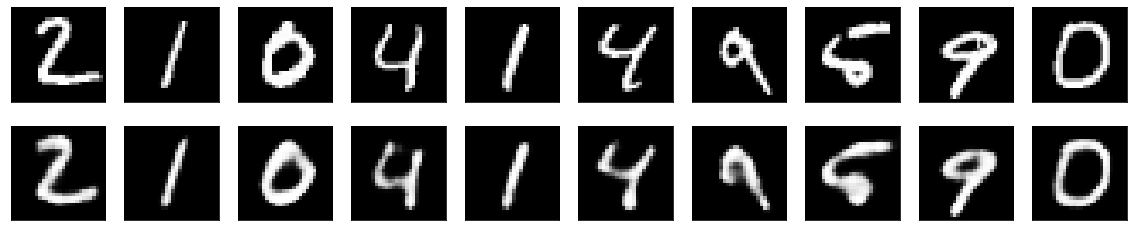

In [11]:
decoded_imgs = model_convAE.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

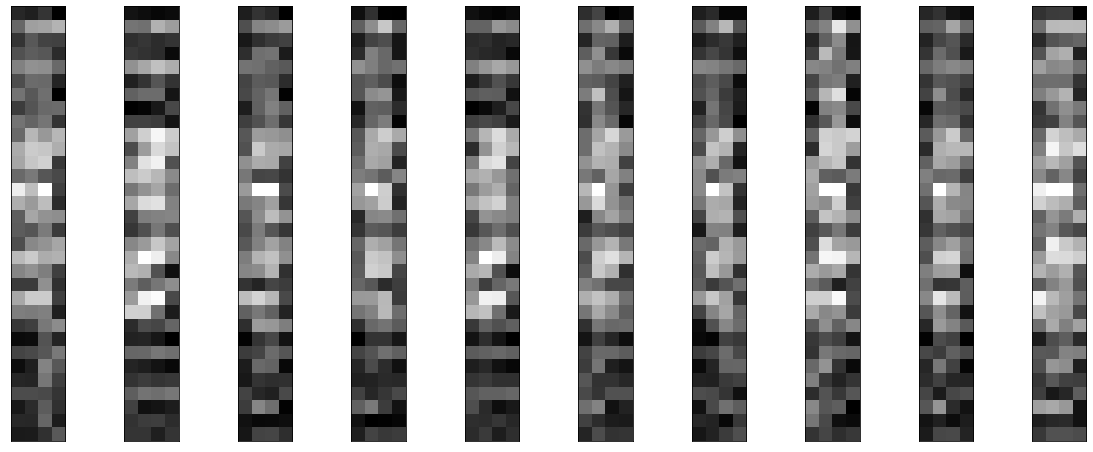

In [12]:
encoded_imgs = model_convAE_encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()